In [74]:
import numpy as np
eps = 0.25

def payoff(a1,a2):
    if a1>a2:
        return 1-a1-eps
    elif a1==a2:
        return (1-a1-eps)/2
    else:
        return 0

def payoff2(a1,a2):
    if a1>a2:
        return 1-a2-eps
    elif a1==a2:
        return (1-a2-eps)/2
    else:
        return 0

N = 2
action2bid = np.linspace(0,1,N+1)
R = np.zeros((N+1,N+1))
for i in range(N+1):
    for j in range(N+1):
        R[i,j] = payoff(action2bid[i],action2bid[j])

np.round(R,2)
print(R)
R = R[0:N,0:N]
A0 = R
B0 = R.T
print(A0)
print(B0)

[[ 0.375  0.     0.   ]
 [ 0.25   0.125  0.   ]
 [-0.25  -0.25  -0.125]]
[[0.375 0.   ]
 [0.25  0.125]]
[[0.375 0.25 ]
 [0.    0.125]]


Initial Condition: (pi0 = 1.0, sigma0 = 1.0), Final Values: (pi = 1.0, sigma = 1.0)


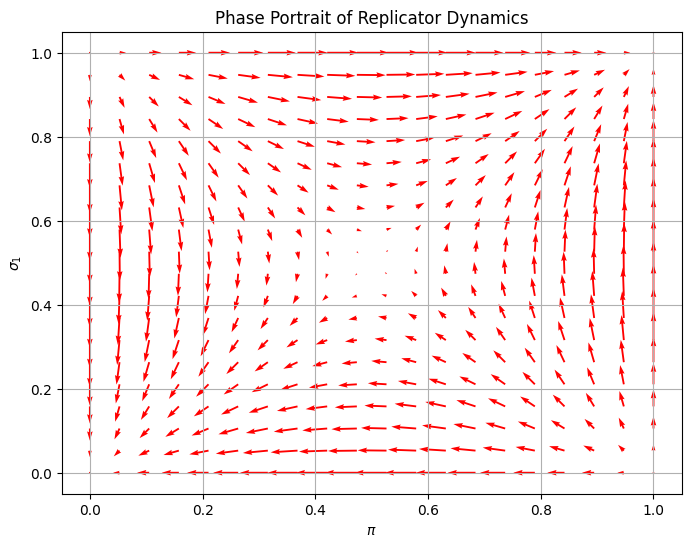

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def replicator_dynamics(y, t, A, B):
    pi, sigma = y[0], y[1]
    pi_dot = alpha * pi * (np.dot(A, [sigma, 1 - sigma])[0] - np.dot([pi, 1 - pi], np.dot(A, [sigma, 1 - sigma])))
    sigma_dot = alpha * sigma * (np.dot([pi, 1 - pi], B)[0] - np.dot([pi, 1 - pi], np.dot(B, [sigma, 1 - sigma])))
    return [pi_dot, sigma_dot]

# Define the payoff matrices A and B
alpha = 0.0005

# Create a grid of initial conditions
N = 20
pi_initial, sigma_initial = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

# Define the time array
t = np.linspace(0, 100, 100)

u, v = np.zeros(pi_initial.shape), np.zeros(sigma_initial.shape)

final_pi_values = np.zeros(pi_initial.shape)
final_sigma_values = np.zeros(sigma_initial.shape)

NI, NJ = pi_initial.shape

for i in range(NI):
    for j in range(NJ):
        pi0 = pi_initial[i, j]
        sigma0 = sigma_initial[i, j]
        initial_conditions_ij = [pi0, sigma0]
        solution = scipy.integrate.odeint(replicator_dynamics, initial_conditions_ij, t, args=(A0, B0))
        u[i, j] = solution[-1, 0] - pi0
        v[i, j] = solution[-1, 1] - sigma0
        final_pi = solution[-1, 0]
        final_sigma = solution[-1, 1]

        # Print the final values when both pi and sigma are equal to 1
        if final_pi == 1.0 and final_sigma == 1.0:
            print(f"Initial Condition: (pi0 = {pi0}, sigma0 = {sigma0}), Final Values: (pi = {final_pi}, sigma = {final_sigma})")

plt.figure(figsize=(8, 6))
Q = plt.quiver(pi_initial, sigma_initial, u, v, color='r', scale=0.03)
plt.xlabel('$\pi$')
plt.ylabel('$\sigma_1$')
plt.title('Phase Portrait of Replicator Dynamics')
plt.grid()
plt.show()
